In [ ]:
# TODO !

# # 3:
# Try 3 different number of components: 10, 20, 40 and then report the results
# when training on all emotions, try 10, 20, and 40
# when training on only two emotions, try a much smaller number
# report on this

# # General plots as stated in 4:
# Do k = 10, number of epochs = 50
# Plot average over the ten folds training and holdout loss
#     - for every 10 epochs, error bar for std
# Plot percent correct over 50 training epochs for training and holdou
# Average test loss and accuracy over 10 folds


In [ ]:
from dataloader import Dataloader
from classifiers import LogisticRegression
from classifiers import SoftmaxRegression
from trainer import Trainer

import matplotlib.pyplot as plt
import numpy as np

## 5D: fear vs surprise on the ALIGNED dataset

Emotions: ['fear', 'surprise', 'sadness', 'happiness', 'anger', 'disgust'] 

fear: 25 # of images
surprise: 83 # of images
sadness: 28 # of images
happiness: 69 # of images
anger: 45 # of images
disgust: 59 # of images

Balanced Set:
fear: 25 # of images
surprise: 25 # of images
Best on fold #1, epoch 49, loss: 0.03595052732759564    accuracy: 1.0
Best on fold #2, epoch 49, loss: 0.022115909433768    accuracy: 1.0
Best on fold #3, epoch 49, loss: 0.05116003870536153    accuracy: 0.8
Best on fold #4, epoch 40, loss: 0.02829305901713274    accuracy: 1.0
Best on fold #5, epoch 49, loss: 0.002872051921422855    accuracy: 1.0
Best on fold #6, epoch 49, loss: 0.026319364789149775    accuracy: 1.0
Best on fold #7, epoch 49, loss: 0.036601200698479754    accuracy: 0.8
Best on fold #8, epoch 49, loss: 0.048644138024568406    accuracy: 0.8
Best on fold #9, epoch 19, loss: 0.040697172311485    accuracy: 0.8
Best on fold #10, epoch 49, loss: 0.04768184286430336    accuracy: 0.8
Test Loss: 0.034033

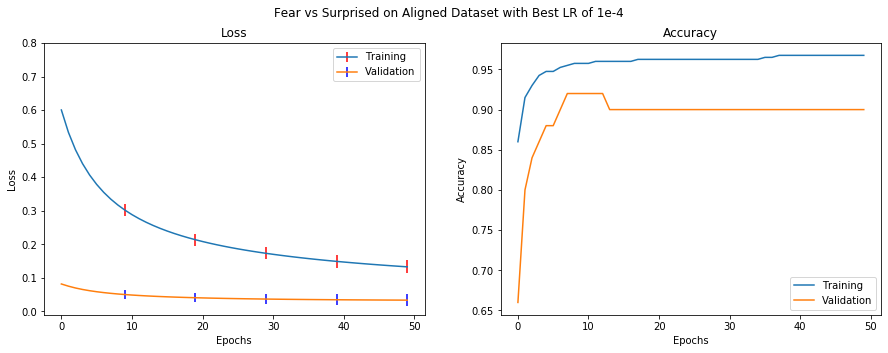

In [42]:
# TODO does this differ from what we observed above? why?
# using best learning rate from part c,
# then plots from #4
# average loss and acc

lr = 1e-4
num_epochs = 50
num_pca_comps = 15
k = 10
dl = Dataloader("./facial_expressions_data/aligned/")
emotions = ['fear', 'surprise']
method = 'batch'
cl = LogisticRegression()

trainer = Trainer(cl, dl, emotions, method)
train_eval, val_eval, test_eval = trainer.train(lr, num_epochs, num_pca_comps, k)

train_loss = [np.mean([train_eval[fold][epoch][0] for fold in range(10)]) for epoch in range(50)]
train_acc = [np.mean([train_eval[fold][epoch][1] for fold in range(10)]) for epoch in range(50)]

val_loss = [np.mean([val_eval[fold][epoch][0] for fold in range(10)]) for epoch in range(50)]
val_acc = [np.mean([val_eval[fold][epoch][1] for fold in range(10)]) for epoch in range(50)]

train_loss_std = np.zeros(50)
val_loss_std = np.zeros(50)
train_acc_std = np.zeros(50)
val_acc_std = np.zeros(50)
for epoch in [9, 19, 29, 39, 49]:
    train_loss_std[epoch] = np.std([train_eval[fold][epoch][0] for fold in range(10)])
    train_acc_std[epoch] = np.std([train_eval[fold][epoch][1] for fold in range(10)])
    
    val_loss_std[epoch] = np.std([val_eval[fold][epoch][0] for fold in range(10)])
    val_acc_std[epoch] = np.std([val_eval[fold][epoch][1] for fold in range(10)])

plot_title = "Fear vs Surprised on Aligned Dataset with Best LR of 1e-4"
data = [[train_loss, val_loss], [train_acc, val_acc]]

sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)

axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    
    if i == 0:
        axs[i].set_ylim(-0.01, 0.8)
        axs[i].errorbar(range(len(data[i][0])), data[i][0], train_loss_std, label="Training", color ='C0', ecolor='r', capthick=1)
        axs[i].errorbar(range(len(data[i][1])), data[i][1], val_loss_std, label="Validation", color ='C1', ecolor='b', capthick=1)
    elif i == 1:
        axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
        axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
        
    axs[i].plot()
    axs[i].legend()
    
test_losses, test_accs = zip(*test_eval)
print("Test Loss: {} Test Accuracy: {}".format(np.mean(np.array(test_losses)), np.mean(np.array(test_accs))))

## 5C: happiness vs anger on ALIGNED dataset

In [ ]:
res = []
lrs = [100, 1e-4, 1e-9]
for lr in lrs:
    num_epochs = 50
    num_pca_comps = 15
    k = 10
    dl = Dataloader("./facial_expressions_data/aligned/")
    emotions = ['anger', 'happiness']
    method = 'batch'
    cl = LogisticRegression()

    trainer = Trainer(cl, dl, emotions, method)
    train_eval, val_eval, test_eval = trainer.train(lr, num_epochs, num_pca_comps, k)
    res.append([train_eval, val_eval, test_eval])


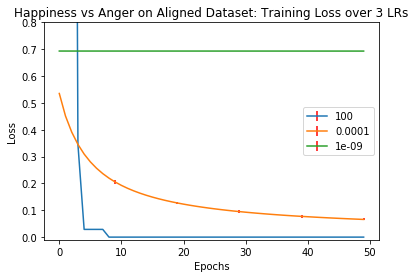

Test Loss: 0.374170077504588 Test Accuracy: 0.8555555555555555
Test Loss: 0.014800933326978277 Test Accuracy: 0.9888888888888889
Test Loss: 0.08663089485999663 Test Accuracy: 0.7222222222222222


In [36]:
# part 5c3 -> plotting all 3 lr training loss curves
train_losses = []
train_losses_std = []
test_evals = []
for train_eval, _, test_eval in res:

    train_loss = [np.mean([train_eval[fold][epoch][0] for fold in range(10)]) for epoch in range(50)]
    train_loss_std = np.zeros(50)
    for epoch in [9, 19, 29, 39, 49]:
        train_loss_std[epoch] = np.std([train_eval[fold][epoch][0] for fold in range(10)])
        
    train_losses.append(train_loss)
    train_losses_std.append(train_loss_std)
    test_evals.append(test_eval)
    
plot_title = "Happiness vs Anger on Aligned Dataset: Training Loss over 3 LRs"

x_label = "Epochs"
y_label = "Loss"

plt.title(plot_title)
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.ylim(-0.01, 0.8)

plt.errorbar(range(len(train_losses[0])), train_losses[0], train_losses_std[0], label=str(lrs[0]), color ='C0', ecolor='r', capthick=1)
plt.errorbar(range(len(train_losses[1])), train_losses[1], train_losses_std[1], label=str(lrs[1]), color ='C1', ecolor='r', capthick=1)
plt.errorbar(range(len(train_losses[2])), train_losses[2], train_losses_std[2], label=str(lrs[2]), color ='C2', ecolor='r', capthick=1)
plt.legend()
plt.show()

test_losses, test_accs = zip(*test_evals[0])
print("Test Loss: {} Test Accuracy: {}".format(np.mean(np.array(test_losses)), np.mean(np.array(test_accs))))
test_losses, test_accs = zip(*test_evals[1])
print("Test Loss: {} Test Accuracy: {}".format(np.mean(np.array(test_losses)), np.mean(np.array(test_accs))))
test_losses, test_accs = zip(*test_evals[2])
print("Test Loss: {} Test Accuracy: {}".format(np.mean(np.array(test_losses)), np.mean(np.array(test_accs))))
                                               

Test Loss: 0.014800933326978277 Test Accuracy: 0.9888888888888889


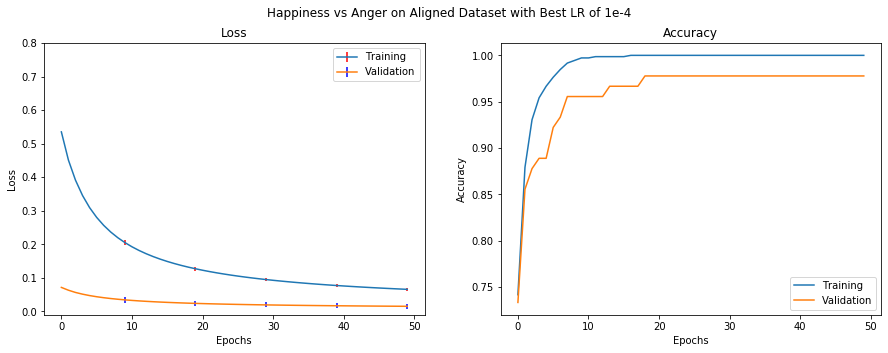

In [38]:
# then plots from #4 (for best lr)
# average loss and acc (for best lr)

train_eval, val_eval, test_eval = res[1]

train_loss = [np.mean([train_eval[fold][epoch][0] for fold in range(10)]) for epoch in range(50)]
train_acc = [np.mean([train_eval[fold][epoch][1] for fold in range(10)]) for epoch in range(50)]

val_loss = [np.mean([val_eval[fold][epoch][0] for fold in range(10)]) for epoch in range(50)]
val_acc = [np.mean([val_eval[fold][epoch][1] for fold in range(10)]) for epoch in range(50)]

train_loss_std = np.zeros(50)
val_loss_std = np.zeros(50)
train_acc_std = np.zeros(50)
val_acc_std = np.zeros(50)
for epoch in [9, 19, 29, 39, 49]:
    train_loss_std[epoch] = np.std([train_eval[fold][epoch][0] for fold in range(10)])
    train_acc_std[epoch] = np.std([train_eval[fold][epoch][1] for fold in range(10)])
    
    val_loss_std[epoch] = np.std([val_eval[fold][epoch][0] for fold in range(10)])
    val_acc_std[epoch] = np.std([val_eval[fold][epoch][1] for fold in range(10)])

plot_title = "Happiness vs Anger on Aligned Dataset with Best LR of 1e-4"
data = [[train_loss, val_loss], [train_acc, val_acc]]

sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)

axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    
    if i == 0:
        axs[i].set_ylim(-0.01, 0.8)
        axs[i].errorbar(range(len(data[i][0])), data[i][0], train_loss_std, label="Training", color ='C0', ecolor='r', capthick=1)
        axs[i].errorbar(range(len(data[i][1])), data[i][1], val_loss_std, label="Validation", color ='C1', ecolor='b', capthick=1)
    elif i == 1:
        axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
        axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
        
    axs[i].plot()
    axs[i].legend()
    
test_losses, test_accs = zip(*test_eval)
print("Test Loss: {} Test Accuracy: {}".format(np.mean(np.array(test_losses)), np.mean(np.array(test_accs))))
                                               
                                               

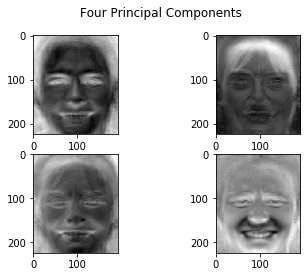

In [40]:
# for one principal comp cal, show a figure of the first 4
eigen_vectors = trainer.dataloader.top_p_eig_vectors
fig, axs = plt.subplots(2, 2)
axs = axs.flatten()
fig.suptitle("Four Principal Components for Aligned")
for i in range(4):
    eig_face = eigen_vectors[:,i].reshape(224,-1)
    axs[i].imshow(eig_face, cmap='gray')
plt.show()

## 5B: happiness vs anger on RESIZED dataset

In [ ]:
# WRITE A NON CROSS VALIDATION TRAIN

lr = 1e-4
num_epochs = 50
num_pca_comps = 15
k = 10
dl = Dataloader("./facial_expressions_data/resized/")
emotions = ['anger', 'happiness']
method = 'batch'
cl = LogisticRegression()

trainer = Trainer(cl, dl, emotions, method)
train_eval, val_eval, test_eval = trainer.no_cross_train(lr, num_epochs, num_pca_comps, k)

train_loss, train_acc = zip(*train_eval[0])
val_loss, val_acc = zip(*val_eval[0])
test_loss, test_acc = zip(*test_eval)

In [ ]:
# plots from #4, no std because not possible
    # training and validation loss
    # training and validation acc
    # test loss and acc

plot_title = "Happiness vs Anger on Resized Dataset"
data = [[train_loss, val_loss], [train_acc, val_acc]]
sub_titles = ["Loss", "Accuracy"]
x_labels = ["Epochs" for i in range(len(data))]
y_labels = ["Loss", "Accuracy"]

fig, axs = plt.subplots(1,len(data), figsize=(15,5))
fig.suptitle(plot_title)

axs = axs.flatten()
for i in range(len(data)):
    axs[i].set_title(sub_titles[i])
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel(y_labels[i])
    axs[i].plot(range(len(data[i][0])), data[i][0], label="Training")
    axs[i].plot(range(len(data[i][1])), data[i][1], label="Validation")
    axs[i].legend()
print("Test Loss: {} Test Accuracy: {}".format(test_loss, test_acc))

ValueError: cannot reshape array of size 43008 into shape (122,newaxis)

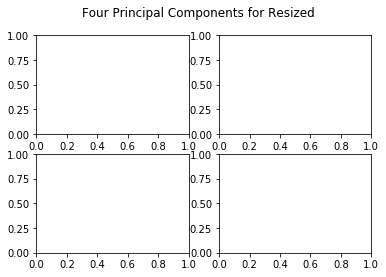

In [41]:
# then show first 4 principal components to show the poor results
# TODO why is above bad because of these 4 components
eigen_vectors = trainer.dataloader.top_p_eig_vectors
fig, axs = plt.subplots(2, 2)
axs = axs.flatten()
fig.suptitle("Four Principal Components for Resized")
for i in range(4):
    eig_face = eigen_vectors[:,i].reshape(122,-1)
    axs[i].imshow(eig_face, cmap='gray')
plt.show()

In [ ]:
str(8)